<h1><center>Fish Market - Predicting the Weight and the Type of Fish</center></h1>

This dataset is a record of 7 common different fish species in fish market sales. The data is taken from https://www.kaggle.com/aungpyaeap/fish-market. The goal of the analysis is to predict (1) the weight and (2) the type of the fish.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Double-click <b>here</b> to see the reading of the data from Kaggle.
<!--
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df=pd.read_csv('/kaggle/input/fish-market/Fish.csv')
df.head()
-->

<h2>Reading the data</h2>

In [2]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Note that the weight is in gram (g), the lengths, height, and width is in centimeter (cm).

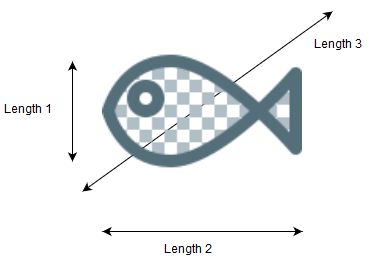

In [3]:
# Image showing the lengths of the fish
from IPython.display import Image
Image(filename = "fish_lenght.png", width=300)

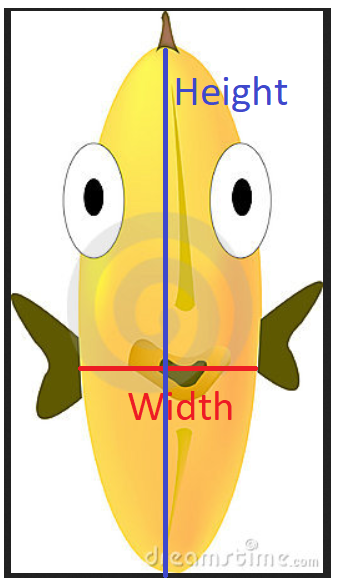

In [4]:
# Image showing the height and weight of the fish
Image(filename = "fish_height_width.png", width=150)

<h2>Explore the data</h2>

In [5]:
# df.dtypes
# Use info() to get a quick description of the data
#total number of rows, each attribute’s type, and the number of nonnull values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
#print(df.isnull().sum())
df.shape

(159, 7)

In [7]:
# Counts the number of each species
species_counts = df["Species"].value_counts().to_frame()
species_counts.reset_index(inplace=True)
species_counts.columns = ["Species","Counts"] 
species_counts

,Species,Counts
0,Perch,56
1,Bream,35
2,Roach,20
3,Pike,17
4,Smelt,14
5,Parkki,11
6,Whitefish,6


Text(0.5, 1.0, 'Species Value Counts')

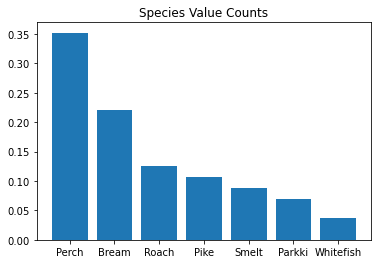

In [8]:
#Visualize the proportion of each species in the dataset
plt.bar(species_counts["Species"], species_counts["Counts"]/sum(species_counts["Counts"]))
plt.title("Species Value Counts")

Note that the Whitefish has the smallest number of representation in the dataset.

In [9]:
# Get a statistical summary of each column
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


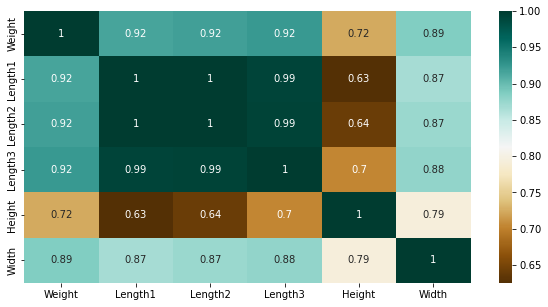

In [10]:
# Check the correlation (Pearson Correlation) between variables
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

From the correllation data above, it seems that there is a strong correlation between the weight, lengths, height, and width with the smallest correlation value of 0.63. 

<h2>Lenghts, height, and widht vs weight.</h2>

Check the Pearson Correlation and P-value between lenghts, height, width, and weight.

In [11]:
from scipy import stats

In [12]:
pearson_coef, p_value = stats.pearsonr(df['Length1'], df['Weight'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9157117160312037  with a P-value of P = 4.749619722769783e-64


In [13]:
pearson_coef, p_value = stats.pearsonr(df['Length2'], df['Weight'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9186177013642214  with a P-value of P = 3.3951132290325303e-65


In [14]:
pearson_coef, p_value = stats.pearsonr(df['Length3'], df['Weight'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9230435593620119  with a P-value of P = 5.023191454304738e-67


In [15]:
pearson_coef, p_value = stats.pearsonr(df['Height'], df['Weight'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7243453291993318  with a P-value of P = 3.8423418389517936e-27


In [16]:
pearson_coef, p_value = stats.pearsonr(df['Width'], df['Weight'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8865066052433447  with a P-value of P = 2.0381946411854982e-54


From the above result, we can say that the correlation between lenghts, height, and width againts weight is statistically significant since the p-value is < 0.001, and the linear relationship is strong since they are above 0.72.

We use regression plot to see how linear is the relation between lengths, height, width and weight.

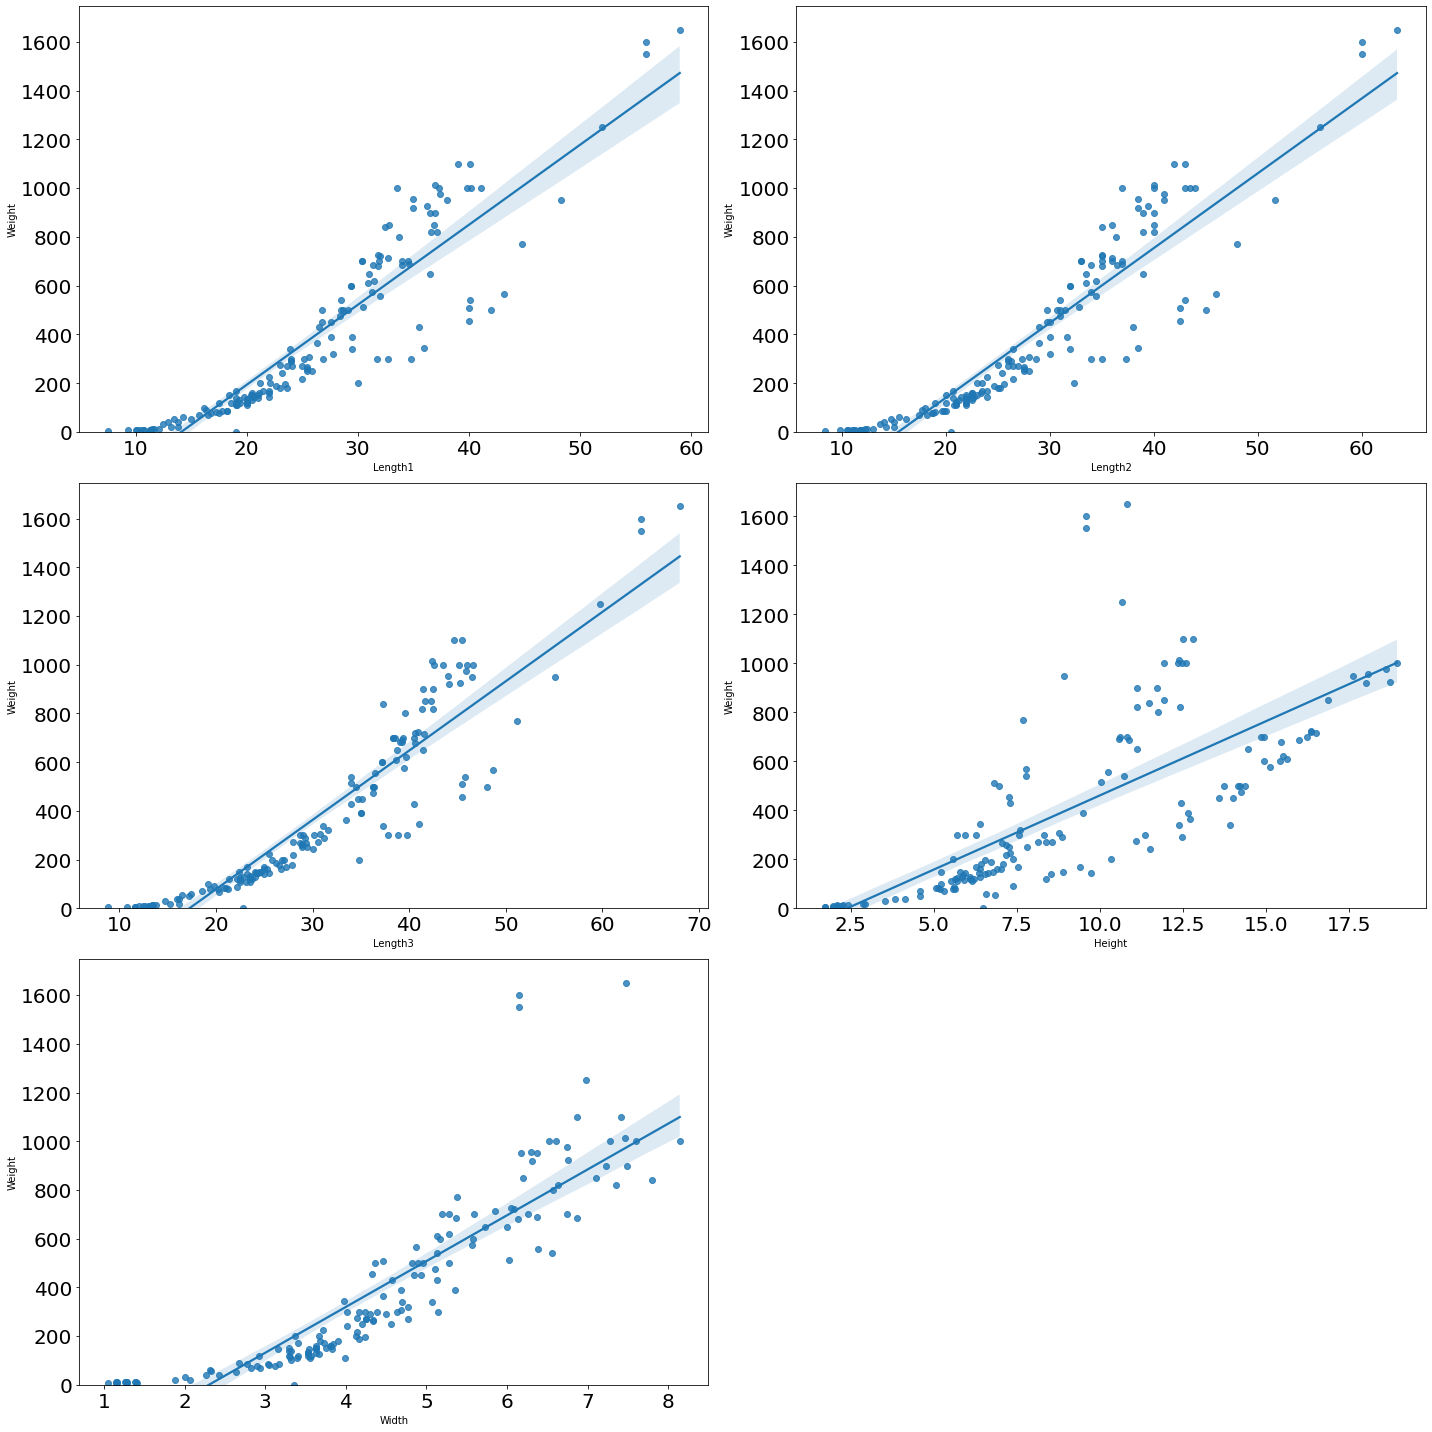

In [17]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(20,20))
sns.regplot(x="Length1", y="Weight", data=df, ax=ax1)
sns.regplot(x="Length2", y="Weight", data=df, ax=ax2)
sns.regplot(x="Length3", y="Weight", data=df, ax=ax3)
sns.regplot(x="Height", y="Weight", data=df, ax=ax4)
sns.regplot(x="Width", y="Weight", data=df, ax=ax5)
ax1.tick_params(labelrotation=0, labelsize=20)
ax2.tick_params(labelrotation=0, labelsize=20)
ax3.tick_params(labelrotation=0, labelsize=20)
ax4.tick_params(labelrotation=0, labelsize=20)
ax5.tick_params(labelrotation=0, labelsize=20)
ax6.tick_params(labelrotation=0, labelsize=20)
ax1.set_ylim(0,)
ax2.set_ylim(0,)
ax3.set_ylim(0,)
ax4.set_ylim(0,)
ax5.set_ylim(0,)
fig.delaxes(ax6)
fig.tight_layout()

From the plots above, we can see that as lengths, height, and weight increase, the weight also increases. This indicates a positive direct correlation between these variables. Again, it looks like the  length, height, and widht is a good predictor of weight. However, note that the trends of the data is not really linear. They are a little curvy. So, instead of just using linear regression to fit the data, we can also try to use polynomial or non-linear regression.   

<h2>Lenghts, height, width, and weight vs species.</h2>

In [18]:
# Count the value of each species
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [19]:
# Calculate the mean of each variables based on species
species_group = df.groupby(["Species"], as_index=False).mean()
species_group

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
1,Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
2,Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
3,Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
4,Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
5,Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
6,Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


From the species_group data, we can see that each species has a unique characteristic. For example, Pike, which has the highest weight, has mean weight of 42 g, length 1, 2 and 3 of 42 cm, 45 cm, 49 cm respectively, and the height of 7 cm and width of 5 cm. It seems that the weight, lengths, height, and width are a good predictor of the type of species.

Using boxplot, we can check if the weight, lengths, height, and width variables are a good predictor of the type of species.

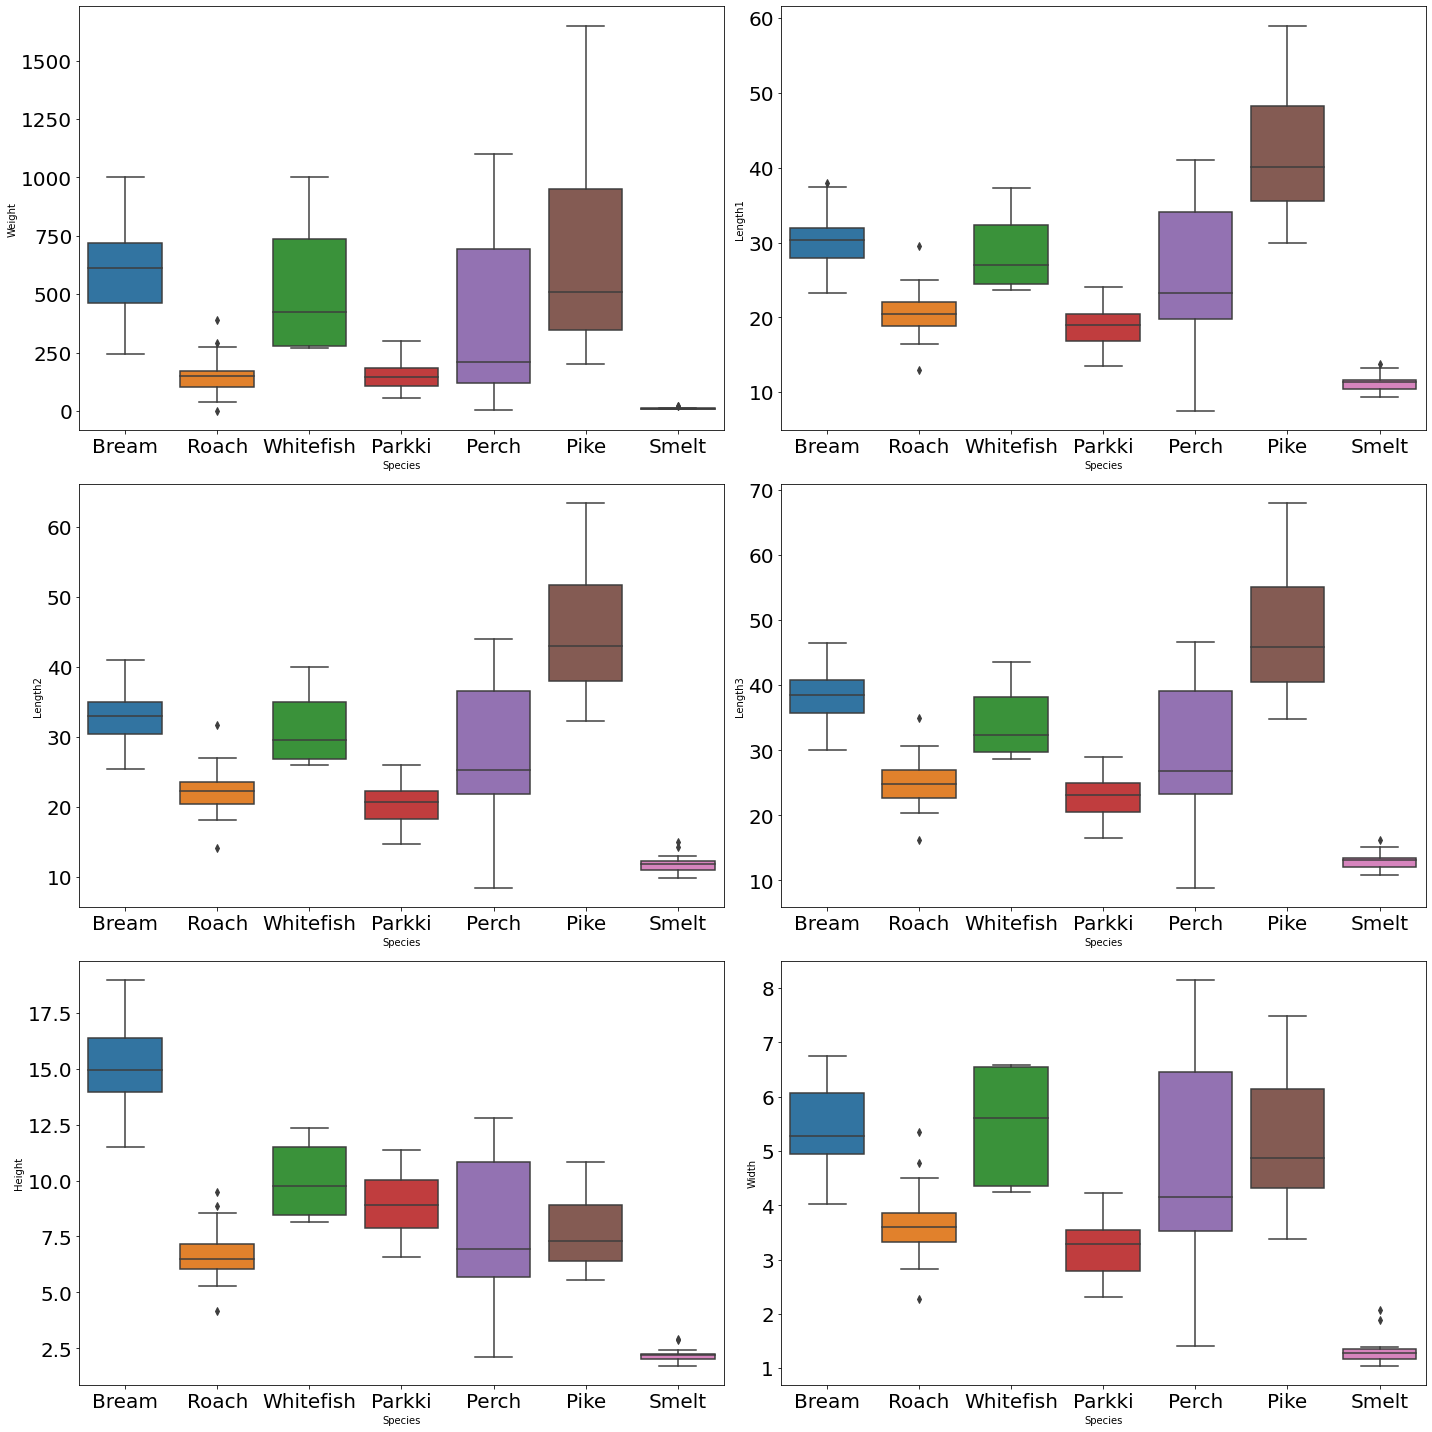

In [20]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(20,20))
sns.boxplot(x="Species", y="Weight", data=df, ax=ax1)
sns.boxplot(x="Species", y="Length1", data=df, ax=ax2)
sns.boxplot(x="Species", y="Length2", data=df, ax=ax3)
sns.boxplot(x="Species", y="Length3", data=df, ax=ax4)
sns.boxplot(x="Species", y="Height", data=df, ax=ax5)
sns.boxplot(x="Species", y="Width", data=df, ax=ax6)
ax1.tick_params(labelrotation=0, labelsize=20)
ax2.tick_params(labelrotation=0, labelsize=20)
ax3.tick_params(labelrotation=0, labelsize=20)
ax4.tick_params(labelrotation=0, labelsize=20)
ax5.tick_params(labelrotation=0, labelsize=20)
ax6.tick_params(labelrotation=0, labelsize=20)
fig.tight_layout()

We see that the distributions of the lengths, hight, and width againts the species are a little overlaped. It shows that they are not a "perfect" predictors.

<h2>Detecting Outliers</h2>

In [21]:
lhw_df = df[["Length1", "Length2", "Length3", "Height", "Width"]]

<AxesSubplot:xlabel='Weight'>

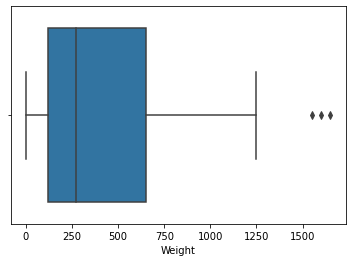

In [22]:
sns.boxplot(x=df['Weight'])

Text(0.5, 0, 'centimeter (cm)')

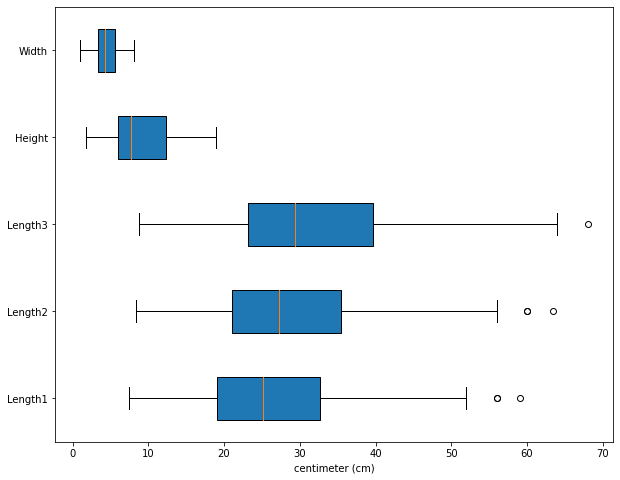

In [23]:
labels = ["Length1", "Length2", "Length3", "Height", "Width"]
plt.figure(figsize=(10,8))
plt.boxplot(lhw_df, vert=False, patch_artist=True, labels = labels) 
plt.xlabel('centimeter (cm)')
#plt.title('Multiple Box Plot')  

We can see that there are few outliers.

<h3>Removing some outliers.</h3>

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight     530.00000
Length1     13.65000
Length2     14.50000
Length3     16.50000
Height       6.42110
Width        2.19885
dtype: float64


In [25]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\susan\AppData\Local\Temp/ipykernel_5740/4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(156, 7)

<h3>Removing incorrect data</h3> 

In [26]:
df.loc[df.Weight < 5]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


On row 40, the roach has weight of 0.0 gram despite having moderate lengths, height, and width. Since the weight is something that we want to predict, we will just drop the whole row. 

In [27]:
df.drop(40, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(155, 7)

<h2>1. Training and Testing: Using Lengths, Height, and Width to Predict Weight</h2> 

In [28]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [29]:
# Will use this later to evaluate the cross-validation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

<h3>Prepare the Data for Training and Testing</h3>

In [30]:
features1=["Length1", "Length2", "Length3", "Height", "Width"]
y=df["Weight"].values

In [31]:
# Normalize the data so all values are within the range of 0 and 1.
scaler = MinMaxScaler()
x = scaler.fit_transform(df[features1])
x[0:5]

array([[0.35280899, 0.35714286, 0.41650295, 0.56833405, 0.41897835],
       [0.37078652, 0.37605042, 0.44007859, 0.62405535, 0.45923545],
       [0.36853933, 0.3802521 , 0.43811395, 0.61812335, 0.51427887],
       [0.42247191, 0.43277311, 0.48526523, 0.63856611, 0.48036479],
       [0.42696629, 0.43277311, 0.49508841, 0.6219658 , 0.57600361]])

From our previous <b>Species Value Counts Historgram</b>, we see that the proportion of each species is not equally represented in our dataset. Therefore, we use <b>StratifiedShuffleSplit</b> to split the train and test set based on the species.

In [32]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
for train_index, test_index in sss.split(df, df["Species"]):
     x_train, x_test = x[train_index], x[test_index]
     y_train, y_test = y[train_index], y[test_index]
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (124, 5) (124,)
Test set: (31, 5) (31,)


In [33]:
# Check the proportion of Species in the test set
sss_test_set = df.loc[test_index]
sss_test_set["Species"].value_counts()/len(sss_test_set)

Perch        0.354839
Bream        0.225806
Roach        0.129032
Pike         0.096774
Smelt        0.096774
Parkki       0.064516
Whitefish    0.032258
Name: Species, dtype: float64

In [34]:
# Check the proportion of Species in the train set
sss_train_set = df.loc[train_index]
sss_train_set["Species"].value_counts()/len(sss_train_set)

Perch        0.362903
Bream        0.225806
Roach        0.120968
Pike         0.088710
Smelt        0.088710
Parkki       0.072581
Whitefish    0.040323
Name: Species, dtype: float64

In [35]:
# Check the proportion of Species in the whole data set
df["Species"].value_counts()/len(df)

Perch        0.361290
Bream        0.225806
Roach        0.122581
Pike         0.090323
Smelt        0.090323
Parkki       0.070968
Whitefish    0.038710
Name: Species, dtype: float64

After checking the proportion of species in the test set and train set, then compare it with the proportion of species in the whole data set. We know that the Stratified Shuffle Split is working correctly.

<h3>Model 1.1: Linear Regression</h3>

In [36]:
lr=LinearRegression()
lr.fit(x_train, y_train)
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [ 4164.38770182 -1665.54279902 -1917.45358493   644.55845601
   344.67504562]
Intercept:  -255.25125672378516


We you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then our model is overfitting. If it performs poorly on both, then it is underfitting

In [37]:
r2scores = cross_val_score(lr, x_train, y_train, cv=4)
display_scores(r2scores)

Scores: [0.90175144 0.93820043 0.82870614 0.91504782]
Mean: 0.8959264582681361
Standard deviation: 0.04094269311492201


In [38]:
print("Mean Square Error (MSE) of training data: %.2f" % np.mean((lr.predict(x_train) - y_train) ** 2))
print("R2-score of training data: %.2f" % r2_score(y_train, lr.predict(x_train)) )

Mean Square Error (MSE) of training data: 9425.22
R2-score of training data: 0.91


Using Cross-Validation of 4 folds, the mean $R^2$ scores looks pretty good since the the mean is close to 0.90. Moreover, the value is very close to the performance of the training set, which is 0.91. This shows that the model is not underfit or overfit.  

Evaluate our system on the Test Set

In [39]:
y_hat= lr.predict(x_test)
y_hat

array([ 331.25627332,  179.5559111 ,  659.25423031,  684.11088321,
         72.42200128,  216.44514355,  291.37311676, -185.68105804,
         83.68864163,  430.94682632,  -78.33595969,  386.09386834,
       -223.3902574 ,  844.15454248,  290.45891307,  429.97282768,
        555.12982215, -164.94962286,  321.20784731,  643.50417954,
        130.485555  ,  440.96277595,  290.26567519,  263.1482618 ,
        469.28045641,  762.69619261,  914.00372478,  361.68005582,
        178.96404352, -189.499091  ,  195.49935815])

In [40]:
# Compare the y_hat with the actual results
np.asanyarray(y_test)

array([ 242. ,  160. ,  556. ,  685. ,  100. ,  170. ,  200. ,    7.5,
         78. ,  320. ,   40. ,  250. ,    5.9, 1015. ,  197. ,  363. ,
        500. ,    9.8,  300. ,  650. ,  115. ,  300. ,  270. ,  145. ,
        390. ,  820. ,  975. ,  300. ,  120. ,    7. ,  140. ])

If we compare the y_test and y_hat, the prediction did a pretty good job. However, for y_test < 20, the y_hat has negative value which is not we want.

In [41]:
print("Mean Square Error (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((y_hat - y_test) ** 2)))
print("R2-score: %.2f" % r2_score(y_test, y_hat) )
print("R2-score: %.2f" % lr.score(x_test , y_test)) # this score should be the same as above

Mean Square Error (MSE): 10911.52
Root Mean Square Error (RMSE): 104.46
R2-score: 0.85
R2-score: 0.85


In [42]:
# Compute the 95% confidence interval for the genaralization error
confidence = 0.95
squared_errors = (y_hat - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([ 77.16228941, 125.9723392 ])

<h3>Model 1.2: Polynomial Regression</h3>

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True) # Surpress the scientific notation

In [44]:
# We use degree 2 since from the previous regression plot, it seems degree 2 will be a good model
poly = PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_train_poly

array([[1.        , 0.25842697, 0.26470588, ..., 0.05294064, 0.08132097,
        0.12491538],
       [1.        , 0.13483146, 0.13235294, ..., 0.08828507, 0.05356296,
        0.03249689],
       [1.        , 0.47191011, 0.47478992, ..., 0.27383521, 0.4067497 ,
        0.60417839],
       ...,
       [1.        , 0.70786517, 0.70588235, ..., 0.4129871 , 0.52727266,
        0.67318435],
       [1.        , 0.51685393, 0.51260504, ..., 0.23217937, 0.33758838,
        0.49085287],
       [1.        , 0.49213483, 0.49579832, ..., 0.58932798, 0.44616681,
        0.33778274]])

In [45]:
lr1=LinearRegression()
lr1.fit(x_train_poly, y_train)
print ('Coefficients: ',lr1.coef_)
print ('Intercept: ',lr1.intercept_)

Coefficients:  [      0.           -1475.29005254     470.04491354     612.05161714
     189.07729517     -87.4544184  -140352.70927337  132778.43479327
  155726.9708808   -36833.96516221   22929.7075165   -39209.25832239
  -59101.34532303   26976.08977175  -16279.1819804   -49690.46790348
   11565.47343491   -5980.51055315   -1689.49463251    1740.62237126
    -456.71903796]
Intercept:  38.93108576360356


In [46]:
# Use cross-validation to get an estimate of a model’s generalization
r2scores_poly = cross_val_score(lr1, x_train_poly, y_train, cv=4)
display_scores(r2scores_poly)

Scores: [0.97362601 0.97890879 0.96839274 0.96618655]
Mean: 0.9717785207222134
Standard deviation: 0.004924112240310786


In [47]:
print("Mean Square Error (MSE) of training data: %.2f" % np.mean((lr1.predict(x_train_poly) - y_train) ** 2))
print("R2-score of training data: %.2f" % r2_score(y_train, lr1.predict(x_train_poly)) )

Mean Square Error (MSE) of training data: 1719.72
R2-score of training data: 0.98


The mean $R^2$ scores of cross-validation method of the degree 2 polynomial regression model, which is 0.97, is better than that of the linear regression. Moreover, the value is close to the value of the training set, which is 0.98. This shows that the model is not underfit or overfit.  

Evaluate our system on the Test Set

In [48]:
x_test_poly=poly.fit_transform(x_test)
y_hat_poly= lr1.predict(x_test_poly)
y_hat_poly

array([ 269.09063569,  148.53374823,  612.26927649,  633.51445627,
         79.18745104,  159.45373271,  192.93082813,    9.32957026,
         88.36285867,  321.83327719,   36.28259761,  261.23221158,
         38.65079937,  935.6845147 ,  203.48717996,  406.34490164,
        459.41147605,    6.25044047,  218.65489919,  628.08347161,
        117.89935874,  276.52987373,  252.72658623,  161.12920759,
        417.40271071,  810.14331493, 1125.79197279,  267.1084198 ,
        119.16113523,    6.0235502 ,  145.51162669])

In [49]:
np.asanyarray(y_test)

array([ 242. ,  160. ,  556. ,  685. ,  100. ,  170. ,  200. ,    7.5,
         78. ,  320. ,   40. ,  250. ,    5.9, 1015. ,  197. ,  363. ,
        500. ,    9.8,  300. ,  650. ,  115. ,  300. ,  270. ,  145. ,
        390. ,  820. ,  975. ,  300. ,  120. ,    7. ,  140. ])

In [50]:
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_hat_poly))
print("Root Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((y_hat_poly - y_test) ** 2)))
print("R2-score: %.2f" % r2_score(y_test, y_hat_poly) )

Residual sum of squares (MSE): 1657.76
Root Mean Square Error (RMSE): 40.72
R2-score: 0.98


In [51]:
# Compute the 95% confidence interval for the genaralization error
confidence = 0.95
squared_errors_poly = (y_hat_poly - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors_poly) - 1, loc=squared_errors_poly.mean(),
    scale=stats.sem(squared_errors_poly)))

array([ 9.87045845, 56.72825234])

<h3>Summary</h3>

| Algorithm            | RMSE    | $R^2$Score| 
| -------------------- | ------- | --------- | 
| Linear  Regression   | 104.46  | 0.85      | 
| Polynomial Regression| 40.72   | 0.98      | 

Polynomial regression (degree 2) is a better model in comparison to the linear regression since it gives us lower MSE and higher R2-score. Moreover, the polynomial regression doesn't give us negative values prediction while linear regression does have few negative values prediction. 

<h2>2. Training and Testing: Using Weight, Lengths, Height, and Width to Predict the Type of Species </h2> 

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

<h3>Prepare the Data for Training and Testing</h3>

In [53]:
features2=["Weight", "Length1", "Length2", "Length3", "Height", "Width"]
y2=df["Species"].values

In [54]:
# Rescaling the distribution of values so that the mean of observed values is 0 and 
# the standard deviation is 1
scaler_S = StandardScaler()
x2 = scaler_S.fit(df[features2]).transform(df[features2].astype(float))
x2[0:5]

array([[-0.42638282, -0.2744675 , -0.24895553, -0.05818953,  0.59098693,
        -0.21694243],
       [-0.2754932 , -0.18659255, -0.15688422,  0.05420147,  0.81322356,
        -0.04593985],
       [-0.11831652, -0.19757692, -0.13642393,  0.04483555,  0.78956462,
         0.18787145],
       [-0.04601525,  0.06604795,  0.11932969,  0.26961754,  0.87109768,
         0.04381256],
       [ 0.1646015 ,  0.08801669,  0.11932969,  0.31644713,  0.80488968,
         0.45006344]])

We choose not to use StratifiedShuffleSplit since in this case the test accuracy for KNN and Decision Tree is far worse than just using Random Sampling.

In [55]:
x2_train, x2_test, y2_train, y2_test = train_test_split( x2, y2, test_size=0.2, random_state=0)
print ('Train set:', x2_train.shape,  y2_train.shape)
print ('Test set:', x2_test.shape,  y2_test.shape)

Train set: (124, 6) (124,)
Test set: (31, 6) (31,)


<h3>Model 2.1: K-Nearest Neighbours (KNN)</h3>

In [56]:
# Find the best k
Ks = 31
mean_acc = np.zeros((Ks-1))
k_scores = []

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x2_train,y2_train)
    
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(neigh, x2_train, y2_train, cv=4, scoring='accuracy')
    
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
    #yhat_knn=neigh.predict(x2_test)
    #mean_acc[n-1] = accuracy_score(y2_test, yhat_knn)

print(k_scores)

[0.7903225806451613, 0.7903225806451613, 0.7661290322580645, 0.782258064516129, 0.7741935483870968, 0.782258064516129, 0.7903225806451613, 0.782258064516129, 0.782258064516129, 0.7661290322580645, 0.7741935483870968, 0.7258064516129031, 0.7338709677419355, 0.6935483870967741, 0.6854838709677419, 0.6693548387096775, 0.6451612903225806, 0.6048387096774194, 0.5645161290322581, 0.5483870967741935, 0.5241935483870968, 0.5, 0.5, 0.4838709677419355, 0.4838709677419355, 0.4838709677419355, 0.4838709677419355, 0.47580645161290325, 0.47580645161290325, 0.47580645161290325]


In [57]:
max(k_scores)

0.7903225806451613

As we can see the k which provides the best mean accuracy is 1, 2, 7 

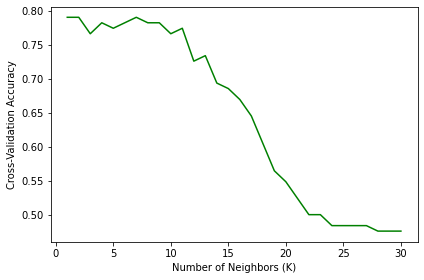

In [58]:
# Visualize the accuracy for k between 1 to 9
plt.plot(range(1,Ks),k_scores,'g')
plt.ylabel('Cross-Validation Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Note that we also can use GridSearchCV to find the best k.

In [59]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [60]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [61]:
# instantiate the grid
grid = GridSearchCV(neigh, param_grid, cv=4, scoring='accuracy')
# fit the grid with data
grid.fit(x2_train, y2_train)
# view the complete results (list of named tuples)
#grid.cv_results_
grid.best_params_

{'n_neighbors': 1}

In [62]:
# Use k = 1 for best accuracy
k = 1 
neigh = KNeighborsClassifier(n_neighbors = k).fit(x2_train,y2_train)
neigh

KNeighborsClassifier(n_neighbors=1)

In [63]:
# Use cross-validation to get an estimate of a model’s generalization
accuracy_scores_knn = cross_val_score(neigh, x2_train, y2_train, cv=4)
display_scores(accuracy_scores_knn)

Scores: [0.70967742 0.90322581 0.74193548 0.80645161]
Mean: 0.7903225806451613
Standard deviation: 0.07391251120896514


In [64]:
print("Train set Accuracy: ", accuracy_score(y2_train, neigh.predict(x2_train)))

Train set Accuracy:  1.0


The mean accuracy scores of the KNN model is 0.79, which is good. However, the accuracy of the training set is 1.0. This shows that the model is overfit.

Evaluate our system on the Test Set

In [65]:
yhat_knn = neigh.predict(x2_test)
yhat_knn

array(['Bream', 'Perch', 'Smelt', 'Perch', 'Bream', 'Bream', 'Roach',
       'Perch', 'Roach', 'Perch', 'Roach', 'Perch', 'Pike', 'Whitefish',
       'Perch', 'Roach', 'Bream', 'Smelt', 'Smelt', 'Perch', 'Perch',
       'Bream', 'Pike', 'Smelt', 'Perch', 'Perch', 'Smelt', 'Parkki',
       'Roach', 'Perch', 'Bream'], dtype=object)

In [66]:
# Compare the y_hat_knn with the actual results
y2_test

array(['Bream', 'Perch', 'Smelt', 'Perch', 'Bream', 'Bream', 'Roach',
       'Perch', 'Whitefish', 'Perch', 'Perch', 'Perch', 'Pike',
       'Whitefish', 'Perch', 'Roach', 'Bream', 'Smelt', 'Perch', 'Perch',
       'Perch', 'Bream', 'Pike', 'Smelt', 'Roach', 'Perch', 'Smelt',
       'Parkki', 'Perch', 'Perch', 'Bream'], dtype=object)

In [67]:
print("Test set Accuracy: ", accuracy_score(y2_test, yhat_knn))

Test set Accuracy:  0.8387096774193549


In [68]:
print (classification_report(y2_test, yhat_knn))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         6
      Parkki       1.00      1.00      1.00         1
       Perch       0.91      0.77      0.83        13
        Pike       1.00      1.00      1.00         2
       Roach       0.40      0.67      0.50         3
       Smelt       0.80      1.00      0.89         4
   Whitefish       1.00      0.50      0.67         2

    accuracy                           0.84        31
   macro avg       0.87      0.85      0.84        31
weighted avg       0.88      0.84      0.85        31



<h3>Model 2.2: Decission Tree</h3>

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
# Preparing parameter for GridSearchCV
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5,6,7,8,9,10,11,12]

In [71]:
# Now we are creating a dictionary to set all the parameters options for different objects.
param_grid2 = dict(criterion=criterion, max_depth=max_depth)
#param_grid2 = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]}

In [72]:
# instantiate the grid
grid2 = GridSearchCV(DecisionTreeClassifier(), param_grid2, cv=4,)
# fit the grid with data
grid2.fit(x2_train, y2_train)
# view the complete results (list of named tuples)
#grid.cv_results_
grid2.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [73]:
# Use the best_params from the grid search
speciesTree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
speciesTree.fit(x2_train,y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [74]:
# Use cross-validation to get an estimate of a model’s generalization
accuracy_scores_tree = cross_val_score(speciesTree, x2_train, y2_train, cv=4)
display_scores(accuracy_scores_tree)

Scores: [0.77419355 0.80645161 0.67741935 0.70967742]
Mean: 0.7419354838709677
Standard deviation: 0.05100447838981256


In [75]:
print("Train set Accuracy: ", accuracy_score(y2_train, speciesTree.predict(x2_train)))

Train set Accuracy:  0.8629032258064516


The mean accuracy scores of the cross-validation of the Decision Tree model is 0.74, which is a little lower than that of the KNN model. However, the train set accuracy is 0.86. It shows that the model is not overfit. 

Evaluate our system on the Test Set

In [76]:
predTree = speciesTree.predict(x2_test)
predTree

array(['Bream', 'Perch', 'Smelt', 'Perch', 'Bream', 'Bream', 'Perch',
       'Perch', 'Roach', 'Perch', 'Perch', 'Perch', 'Pike', 'Parkki',
       'Perch', 'Perch', 'Bream', 'Perch', 'Smelt', 'Perch', 'Perch',
       'Bream', 'Pike', 'Smelt', 'Perch', 'Perch', 'Smelt', 'Perch',
       'Perch', 'Perch', 'Bream'], dtype=object)

In [77]:
# Compare the predTree with the actual results
y2_test

array(['Bream', 'Perch', 'Smelt', 'Perch', 'Bream', 'Bream', 'Roach',
       'Perch', 'Whitefish', 'Perch', 'Perch', 'Perch', 'Pike',
       'Whitefish', 'Perch', 'Roach', 'Bream', 'Smelt', 'Perch', 'Perch',
       'Perch', 'Bream', 'Pike', 'Smelt', 'Roach', 'Perch', 'Smelt',
       'Parkki', 'Perch', 'Perch', 'Bream'], dtype=object)

In [78]:
print("Test set Accuracy: ", accuracy_score(y2_test, predTree))

Test set Accuracy:  0.7419354838709677


In [79]:
print (classification_report(y2_test, predTree))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         6
      Parkki       0.00      0.00      0.00         1
       Perch       0.71      0.92      0.80        13
        Pike       1.00      1.00      1.00         2
       Roach       0.00      0.00      0.00         3
       Smelt       0.75      0.75      0.75         4
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.74        31
   macro avg       0.49      0.52      0.51        31
weighted avg       0.65      0.74      0.69        31



C:\Miniconda\envs\IBM_DS\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Miniconda\envs\IBM_DS\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Miniconda\envs\IBM_DS\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note that in this case the precision and recall of Parkki and Roach is 0.0.

The test accuracy of the Decision Tree is far lower than the accuracy of the test set of the KNN. Let's visualize it.

In [80]:
# Visualize the decision tree
#from six import StringIO
#import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz 

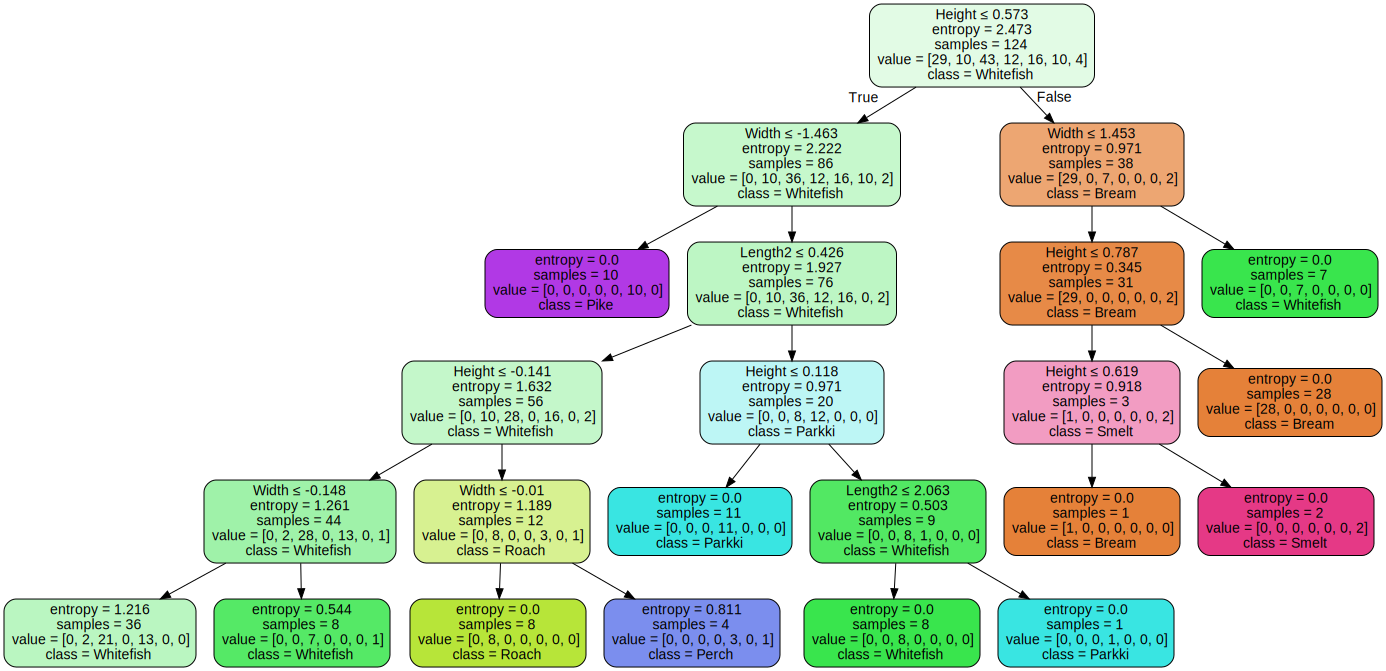

In [81]:
import graphviz

targetNames = df["Species"].unique().tolist()
featureNames = df.columns[1:7]
dot_data = tree.export_graphviz(speciesTree,feature_names=featureNames,
                            class_names=targetNames,filled=True, rounded=True,  
                            special_characters=True,
                            out_file=None)
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render("speciestree2")
graph

Double-click <b>here</b> for other option.
<!--
dot_data = StringIO()
filename = "speciestree.png"
featureNames = df.columns[1:7]
targetNames = df["Species"].unique().tolist()
out=tree.export_graphviz(speciesTree,feature_names=featureNames, 
                         out_file=dot_data, class_names= targetNames, filled=True, 
                         rounded=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 25))
plt.imshow(img, interpolation='nearest')
-->

<h3>Summary</h3>

| Algorithm       | Accuracy | F1 Score |
| ----------------| -------- | -------- |
| KNN             | 0.84     | 0.85     |
| Decision Tree   | 0.77     | 0.72

<h4>Conclusion</h4>
K-Nearest Neighbours seems to performs slightly better than the decision tree.  